In [4]:
#import torch
#print(torch.__version__)
#print(torch.version.cuda)
#torch.cuda.is_available()

2.0.0+cu117
11.7


C:\Users\ASUS\anaconda3\lib\site-packages\torch\cuda\__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


False

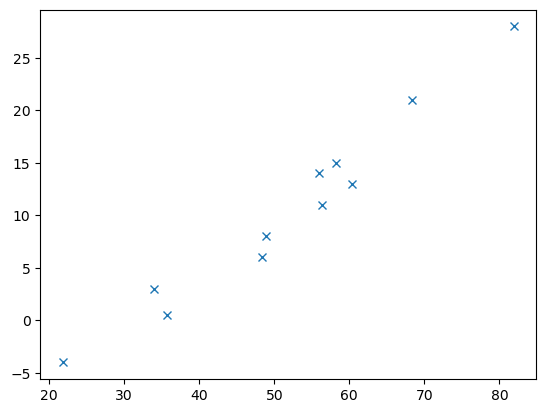

In [6]:
import numpy as np
values = np.loadtxt('vl5_data.csv')
import matplotlib.pyplot as plt
t_u = np.array(values[:,1])
t_c = np.array(values[:,0])
plt.plot(t_u, t_c, 'x')


In [7]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()


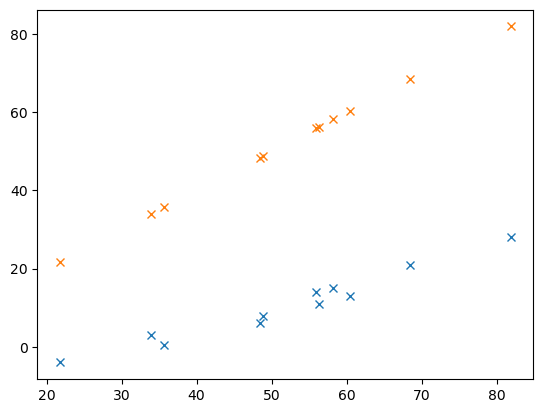

1763.8845454545458


In [8]:
w = np.ones(1)
b = np.zeros(1)
t_p = model(t_u, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [9]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w+delta, b), t_c) - loss_fn(model(t_u, w-delta, b), t_c))/(2.0 * delta)
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c))/(2.0 * delta)

loss_fn = 1763.8845454545458
loss_fn = 1565.7615026803135
loss_fn = 1379.6481582960644
loss_fn = 1205.5445123017982
loss_fn = 1043.4505646975151
loss_fn = 893.3663154832143
loss_fn = 755.2917646588973
loss_fn = 629.2269122245624
loss_fn = 515.1717581802109
loss_fn = 413.1263025258419
loss_fn = 323.0905452614561
loss_fn = 245.064486387053
loss_fn = 179.0481259026329
loss_fn = 125.04146380819566
loss_fn = 83.04450010374133
loss_fn = 53.05723478926986
loss_fn = 35.07966786478131
loss_fn = 29.11179933027563
loss_fn = 35.15362918575284
loss_fn = 53.20515743121293


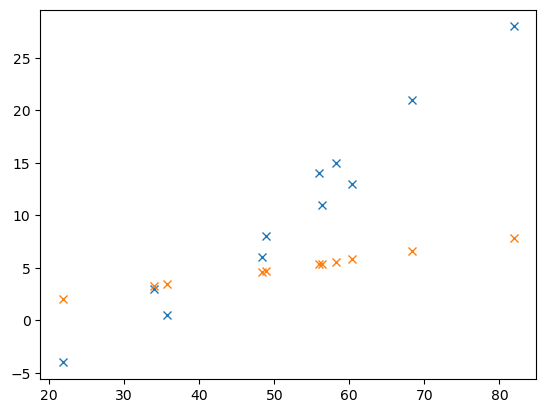

83.26638406665587


In [10]:
w = np.ones(1)
b = np.zeros(1)
learning_rate = 1e-5
for i in range(20):
    t_p = model(t_u, w, b)
    print(f'loss_fn = {loss_fn(t_p, t_c)}')
    w = w - learning_rate*loss_rate_of_change_w
    b = b - learning_rate*loss_rate_of_change_b
    
t_p = model(t_u, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [11]:
def dloss_fn(t_p, t_c):
    return 2*(t_p-t_c) / t_p.size

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return np.stack([dloss_dw.sum(), dloss_db.sum()])

loss_fn = 1763.8845454545458
loss_fn = 41399.58729844656
loss_fn = 986624.2342658172
loss_fn = 23528155.76876515
loss_fn = 561094162.9902915
loss_fn = 13380862490.17738
loss_fn = 319104174143.7968
loss_fn = 7609933532594.718
loss_fn = 181480196963057.9
loss_fn = 4327904015034939.0
loss_fn = 1.0321100305600354e+17
loss_fn = 2.4613556850660526e+18
loss_fn = 5.869792588993332e+19
loss_fn = 1.399816582660073e+21
loss_fn = 3.3382550326640697e+22
loss_fn = 7.961004892462503e+23
loss_fn = 1.8985247764977946e+25
loss_fn = 4.5275645168723055e+26
loss_fn = 1.0797246740311345e+28
loss_fn = 2.574906149580374e+29


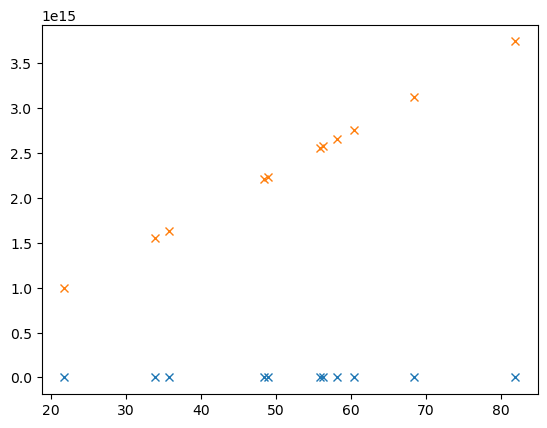

6.140585501666178e+30


In [12]:
w = np.ones(1) 
b = np.zeros(1)
learning_rate = 1e-3
for i in range(20):
    t_p = model(t_u, w, b)
    print(f'loss_fn = {loss_fn(t_p, t_c)}')
    grad = grad_fn(t_u, t_c, t_p, w, b)
    w = w - (learning_rate*grad[0])
    b = b - (learning_rate*grad[1])
    
t_p = model(t_u, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [13]:
t_un = t_u * 0.1

loss_fn = 80.36434545454544
loss_fn = 37.57491443720965
loss_fn = 30.871081493991234
loss_fn = 29.756196009195058
loss_fn = 29.507148000491885
loss_fn = 29.39245416713703
loss_fn = 29.298826583908706
loss_fn = 29.208719127832033
loss_fn = 29.119413503209987
loss_fn = 29.030487848051678
loss_fn = 28.94187595900097
loss_fn = 28.853566717584552
loss_fn = 28.765557539430105
loss_fn = 28.67784716479513
loss_fn = 28.59043454200423
loss_fn = 28.50331865451376
loss_fn = 28.416498494118954
loss_fn = 28.329973056794543
loss_fn = 28.243741342040803
loss_fn = 28.157802352772514


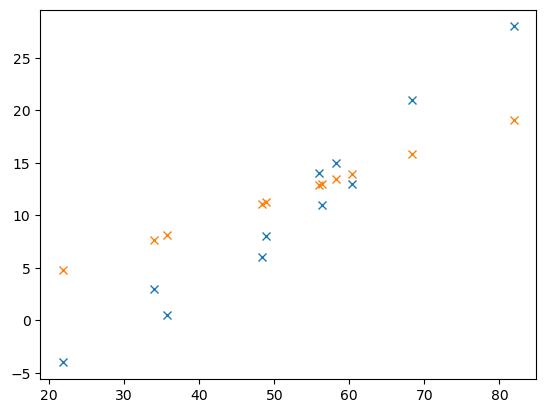

28.072155095292


In [14]:
w = np.ones(1)
b = np.zeros(1)
learning_rate = 1e-2
for i in range(20):
    t_p = model(t_un, w, b)
    print(f'loss_fn = {loss_fn(t_p, t_c)}')
    grad = grad_fn(t_un, t_c, t_p, w, b)
    w = w - learning_rate*grad[0]
    b = b - learning_rate*grad[1]
    
t_p = model(t_un, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [15]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for i in range(n_epochs):
        t_p = model(t_u, *params)
        print(f'loss_fn = {loss_fn(t_p, t_c)}')
        grad = grad_fn(t_u, t_c, t_p, *params)
        params = params - learning_rate * grad
    return params

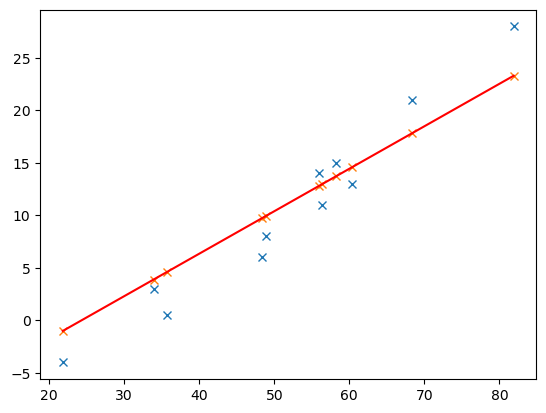

7.843380301421292


In [16]:
w = np.ones(1)
b = np.zeros(1)
learning_rate = 1e-2

t_un = t_u * 0.1
params = [w,b]

for i in range(500):
    t_p = model(t_un, *params)
    grad = grad_fn(t_un, t_c, t_p, *params)
    params[0] -= learning_rate * grad[0]
    params[1] -= learning_rate * grad[1]

t_p = model(t_un, *params)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.plot([min(t_u) , max(t_u)],[min(t_p) , max(t_p)], color = 'red')
plt.show()
print(loss_fn(t_p, t_c))

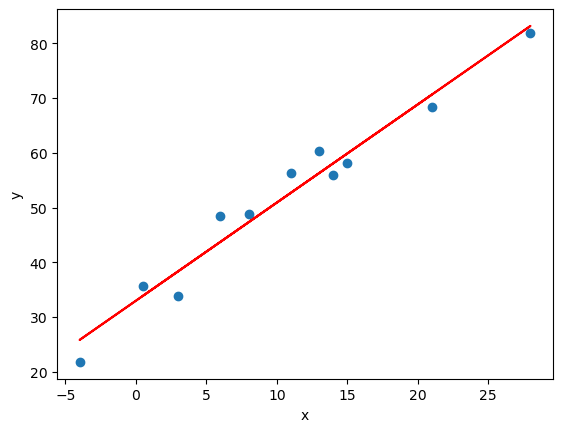

In [17]:
data = np.loadtxt('vl5_data.csv')


x = data[:, 0]
y = data[:, 1]

x_mean = np.mean(x)
y_mean = np.mean(y)

x_dev = x - x_mean
y_dev = y - y_mean

m = np.sum(x_dev * y_dev) / np.sum(x_dev**2)
b = y_mean - m * x_mean

plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()